## XGBoost
The most accurate modeling technique for structured data.

As per example on the previous chapter, the model that being used is Random Forest metohd, which more better than a single decision tree.

This is called an `ensemble method` which by the definition, this combinse the prediction of several models (such as several trees in random forest)

### Gradient Boosting
Gradient boosting is a method that goes through cycles to iteratively add models into an ensemble.

It basically start with initialize a single model (which can be pretty in accurate, subsequent additions to the ensamble will adddress the predictions)
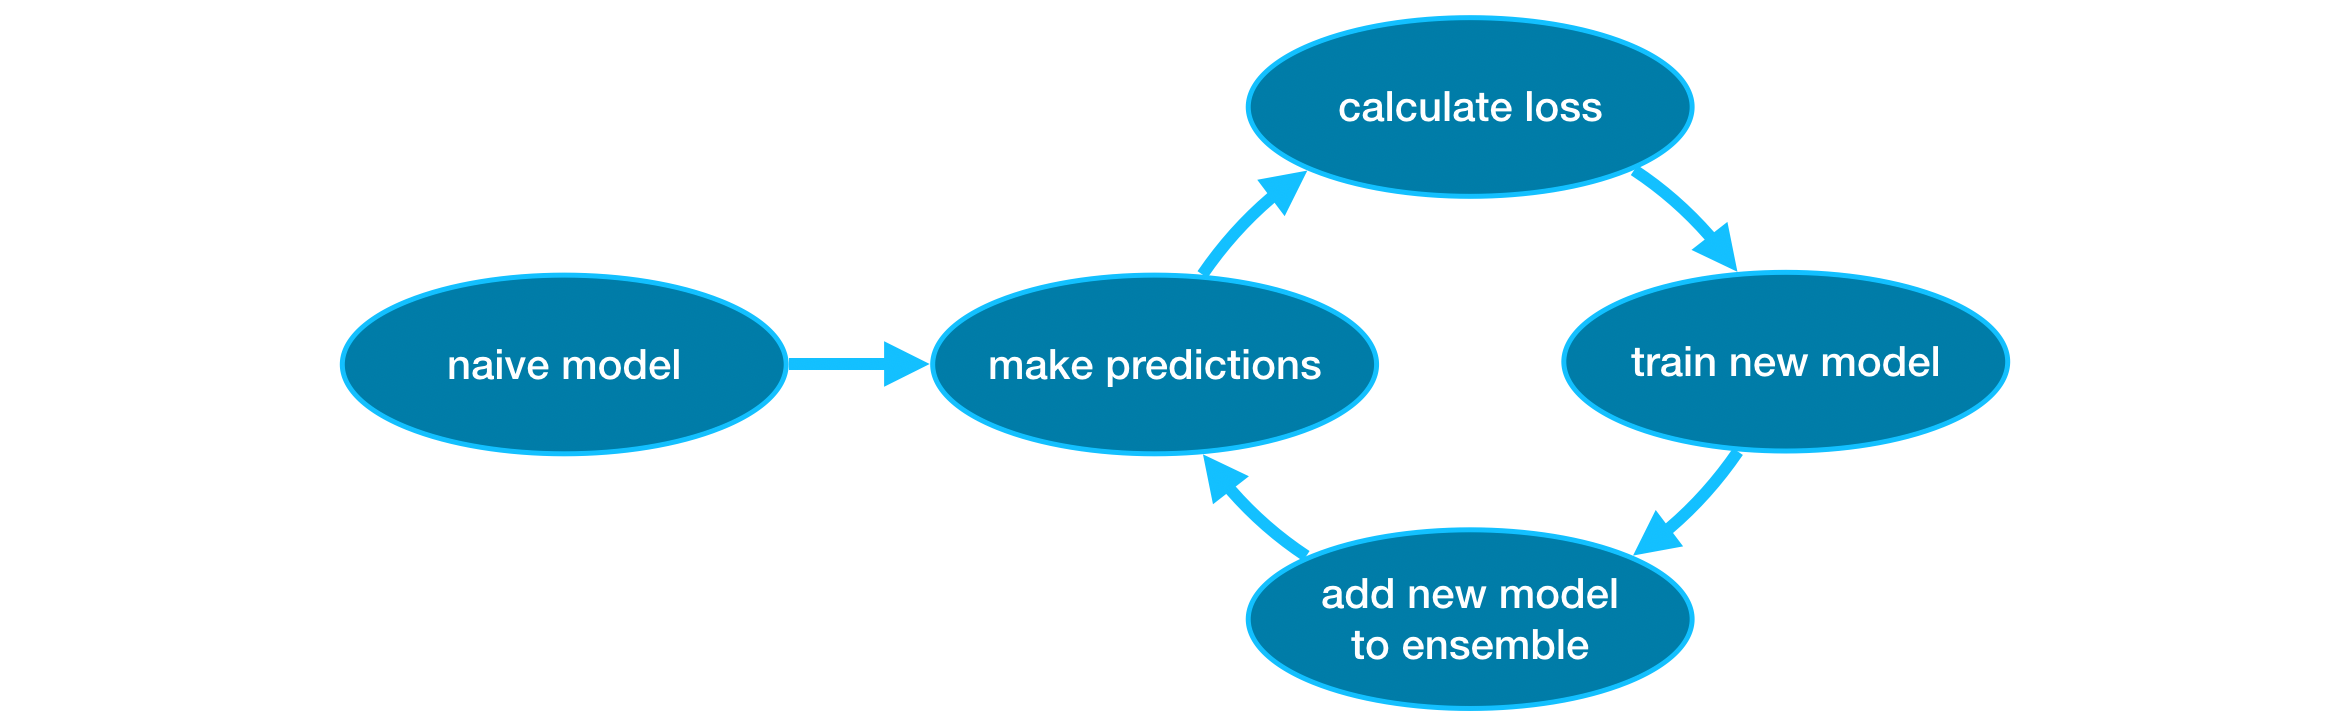

- First, we use the current ensemble to generate predictions for each observation in the dataset. To make a prediction, we add the predictions from all models in the ensemble.
- These predictions are used to calculate a loss function (like mean squared error, for instance).
- Then, we use the loss function to fit a new model that will be added to the ensemble. Specifically, we determine model parameters so that adding this new model to the ensemble will reduce the loss. (Side note: The "gradient" in "gradient boosting" refers to the fact that we'll use gradient descent on the loss function to determine the parameters in this new model.)
- Finally, we add the new model to ensemble, and ...
- ... repeat!

### Example
we can use the `XGBoost` library that stands for `Extreme Gradient Boosting` that is an implementation of gradient boosting with several additional featuers focused on performance and speed.
```python
from xgboost import XGBRegressor

my_model = XGBRegressor()
my_model.fit(X_train, y_train)
```

Also don't forget to make predictions and evaluate the model
```python
from sklearn.metrics import mean_absolute_error

predictions = my_model.predict(X_valid)
print("MAE: " + mean_absolute_error(predictions, y_valid))
```

### Parameter Tuning
XGBoost has a few parameters that can dramatically affect accuracy and training speed. The first parameters you should understand are:

#### n_estimators
`n_estimators` specifies how many times to go through the modeling cycle described above. It is equal to the number of models that we include in the ensemble.
- Too low a value causes underfitting, which leads to inaccurate predictions on both training data and test data.
- Too high a value causes overfitting, which causes accurate predictions on training data, but inaccurate predictions on test data (which is what we care about).

Typical values range from 100-1000, though this depends a lot on the learning_rate parameter discussed below.

### early_stoopings_round
`early_stopping_rounds` offers a way to automatically find the ideal value for n_estimators. Early stopping causes the model to stop iterating when the validation score stops improving, even if we aren't at the hard stop for n_estimators. It's smart to set a high value for n_estimators and then use early_stopping_rounds to find the optimal time to stop iterating.

### learning_rate
instead of getting the predictions by simpling adding from each component model, we can multiply the predictions with a small number (learning_rate) before adding them.

In general, a small `learning_rate` and large number of estimators will yield more accurate XGBoost models, though it will take a model longe to trained (as default it will be set at = `0.1`)
```python
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)], 
             verbose=False)
```

### n_jobs
On larger dataset, parallelism can help to make the building model faster. It's common to set the parameter `n_jobs` to be equal to cores on the machine.
```python
my_model = XGBREgressor(n_estimators=1000, learning_rate=0.2, n_jobs=4)
my_model.fit(X_train, y_train,
                early_stooping_rounds = 5.
                eval_set=[X_valid, y_valid],
                verbose=False
                )
```